In [ ]:
import pandas as pd
import torch as th
from torch.utils.data import DataLoader, Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2

from solution.dstl_detection.dstl_dataset import DstlDataset
from solution.dstl_detection.dstl_train import DstlTrain

In [ ]:
MODEL_NAME = "dstl_model"
LOCATION = "models/dstl"
DSTL_PATH = "/Users/cristianion/Desktop/satimg_data/DSTL"
TRAIN_WKT_FILE = DSTL_PATH + "/train_wkt_v4.csv"
GRID_SIZES_FILE = DSTL_PATH + "/grid_sizes.csv"

IMAGES_MULTICHANNEL = DSTL_PATH + "/sixteen_band"
IMAGES_RGB = DSTL_PATH + "/three_band"

# Column names
COL_MULTIPOLYGONWKT = "MultipolygonWKT"
COL_CLASSTYPE = "ClassType"
COL_IMAGEID = "ImageId"
COL_XMAX = "Xmax"
COL_YMIN = "Ymin"

# Image extension
EXT_TIFF = ".tif"


# resize parameters
IMAGE_RES_X = 512
IMAGE_RES_Y = 512


CLASSES = ["building", "structures", "road", "track", "tree", "crops", "waterway", "standing_water", "vehicle_large", "vehicle_small"]


In [ ]:
DSTL_TRAIN_TRANSFORM = A.Compose([
    A.Resize(height=IMAGE_RES_Y, width=IMAGE_RES_X),
    A.Normalize(
        mean=[0.0, 0.0, 0.0],
        std=[1.0, 1.0, 1.0],
        max_pixel_value=255.0,
    ),
    ToTensorV2(),
])

DSTL_VAL_TRANSFORM = A.Compose([
    A.Resize(height=IMAGE_RES_Y, width=IMAGE_RES_X),
    A.Normalize(
        mean=[0.0, 0.0, 0.0],
        std=[1.0, 1.0, 1.0],
        max_pixel_value=255.0,
    ),
    ToTensorV2(),
])

In [ ]:
dataset = DstlDataset(DSTL_TRAIN_TRANSFORM, train_file=TRAIN_WKT_FILE, grid_sizes_file=GRID_SIZES_FILE, classes=CLASSES, train_res_x=IMAGE_RES_X, train_res_y=IMAGE_RES_Y)

In [ ]:
# image and mask stats
image, mask = dataset[0]

In [ ]:
print("Image shape " + str(image.shape))
print("Mask shape " + str(mask.shape))

In [ ]:
dstl_valset = DstlDataset(DSTL_VAL_TRANSFORM, train_file=TRAIN_WKT_FILE, grid_sizes_file=GRID_SIZES_FILE, classes=CLASSES, train_res_x=IMAGE_RES_X, train_res_y=IMAGE_RES_Y)

In [ ]:

dstl_train = DstlTrain(dataset, dstl_valset)

In [ ]:
dstl_train.train()

In [21]:
from shapely import MultiPolygon, Polygon
ob = MultiPolygon([
    (
    ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)),
    [((0.3,0.3), (0.3,0.4), (0.4,0.4), (0.4,0.3))]
    )
])

print(len(ob.geoms))
print(type(ob.geoms[0]) == Polygon)
print(ob)

1
True
MULTIPOLYGON (((0 0, 0 1, 1 1, 1 0, 0 0), (0.3 0.3, 0.3 0.4, 0.4 0.4, 0.4 0.3, 0.3 0.3)))


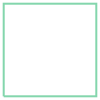

In [22]:
ob.geoms[0].exterior

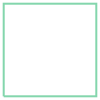

In [23]:
ob.geoms[0].interiors[0]

In [5]:
path = "/Users/cristianion/Desktop/visual_recognition_train/models/dstl/dstl_model_1_2023_09_21_20_36_51_val.tsv"

import pandas as pd

df = pd.read_csv(path, sep='\t')

In [6]:
df

,epoch,train_loss,val_loss,train_error_rate,val_error_rate
0,0,1.301889,0.709654,0.416217,0.374589
1,1,0.744997,0.527355,0.194885,0.187705
2,2,0.830322,0.438111,0.280615,0.265113
3,3,0.618338,0.499981,0.328515,0.356508
4,4,0.473111,0.348308,0.312918,0.319832
5,5,0.527379,0.309640,0.295268,0.306189
6,6,2.703512,0.480483,0.425705,0.433344
7,7,0.697764,0.347143,0.331093,0.369764
8,8,0.794784,0.277032,0.377022,0.388599
9,9,0.488140,0.347244,0.367874,0.349717


<Axes: xlabel='epoch'>

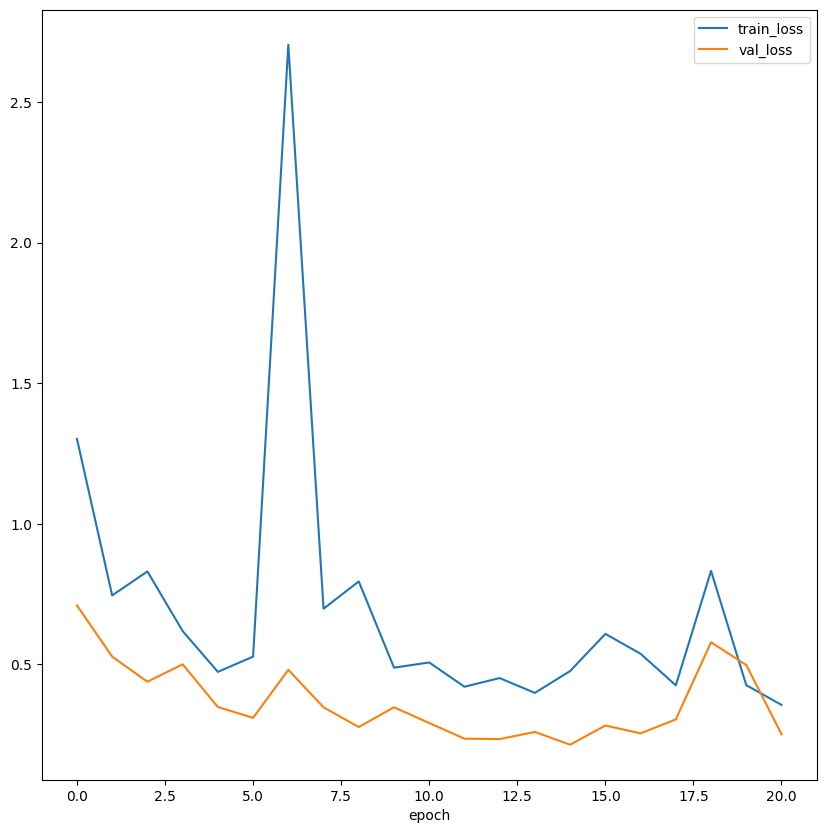

In [7]:
df.plot(x='epoch', y=['train_loss', 'val_loss'], figsize=(10, 10))

<Axes: xlabel='epoch'>

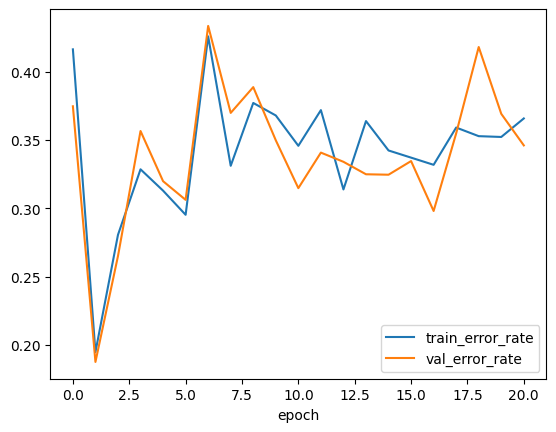

In [8]:
df.plot(x='epoch', y=['train_error_rate', 'val_error_rate'])

In [2]:

SAMPLE_SUBMISSION = "/Users/cristianion/Desktop/satimg_data/DSTL/sample_submission.csv"
TRAIN_WKT = "/Users/cristianion/Desktop/satimg_data/DSTL/train_wkt_v4.csv"


In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv(TRAIN_WKT)
subm_df = pd.read_csv(SAMPLE_SUBMISSION)

In [5]:
train_images = train_df["ImageId"].unique()

In [6]:
submit_images = subm_df["ImageId"].unique()

In [7]:
len(train_images)

25

In [8]:
len(submit_images)

429

In [9]:
subm_df

,ImageId,ClassType,MultipolygonWKT
0,6120_2_4,1,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
1,6120_2_4,2,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
2,6120_2_4,3,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
3,6120_2_4,4,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
4,6120_2_4,5,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
...,...,...,...
4285,6130_1_0,6,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
4286,6130_1_0,7,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
4287,6130_1_0,8,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."
4288,6130_1_0,9,"POLYGON ((0 0, 0.009188 0, 0.009188 -0.0090399..."


In [22]:
train_sub = set(train_images).intersection(set(submit_images))

In [18]:
train_df[train_df.ImageId == '6010_1_2']

,ImageId,ClassType,MultipolygonWKT
220,6010_1_2,1,MULTIPOLYGON EMPTY
221,6010_1_2,2,MULTIPOLYGON (((0.008926999999999999 -0.008574...
222,6010_1_2,3,MULTIPOLYGON EMPTY
223,6010_1_2,4,"MULTIPOLYGON (((0.008765 -0.007289, 0.00885 -0..."
224,6010_1_2,5,MULTIPOLYGON (((0.007405 -0.009022000000000001...
225,6010_1_2,6,MULTIPOLYGON EMPTY
226,6010_1_2,7,MULTIPOLYGON EMPTY
227,6010_1_2,8,MULTIPOLYGON EMPTY
228,6010_1_2,9,MULTIPOLYGON EMPTY
229,6010_1_2,10,MULTIPOLYGON EMPTY


In [19]:
subm_df[subm_df.ImageId == '6010_1_2']

,ImageId,ClassType,MultipolygonWKT
1030,6010_1_2,1,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1031,6010_1_2,2,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1032,6010_1_2,3,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1033,6010_1_2,4,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1034,6010_1_2,5,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1035,6010_1_2,6,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1036,6010_1_2,7,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1037,6010_1_2,8,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1038,6010_1_2,9,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."
1039,6010_1_2,10,"POLYGON ((0 0, 0.009169 0, 0.009169 -0.009042,..."


In [27]:
for x in train_sub:
    # print(subm_df[subm_df.ImageId == '6010_1_2'])
    print(train_df[train_df.ImageId == x])


      ImageId  ClassType                                    MultipolygonWKT
210  6070_2_3          1  MULTIPOLYGON (((0.0045699999999998 -0.00904499...
211  6070_2_3          2  MULTIPOLYGON (((0.0047860000000002 -0.00904499...
212  6070_2_3          3  MULTIPOLYGON (((0.0057290000000002 -0.00798699...
213  6070_2_3          4                                 MULTIPOLYGON EMPTY
214  6070_2_3          5  MULTIPOLYGON (((0.007875999999999699 -0.009043...
215  6070_2_3          6                                 MULTIPOLYGON EMPTY
216  6070_2_3          7  MULTIPOLYGON (((0.0090125999999999 -0.00786559...
217  6070_2_3          8  MULTIPOLYGON (((0.0011729999999996 -0.00854899...
218  6070_2_3          9                                 MULTIPOLYGON EMPTY
219  6070_2_3         10  MULTIPOLYGON (((0.0075799999999997 -0.00903299...
      ImageId  ClassType                                    MultipolygonWKT
220  6010_1_2          1                                 MULTIPOLYGON EMPTY
221  6010_1_

In [28]:
train_sub

{'6010_1_2', '6040_4_4', '6070_2_3', '6100_2_2'}

In [29]:
train_df = pd.read_csv(TRAIN_WKT)
subm_df = pd.read_csv(SAMPLE_SUBMISSION)
train_images = train_images = train_df["ImageId"].unique()
submit_images = subm_df["ImageId"].unique()
train_sub = set(train_images).intersection(set(submit_images))
print(train_sub)

{'6070_2_3', '6010_1_2', '6040_4_4', '6100_2_2'}
